In [2]:
pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
df = pd.read_csv("C:\\Users\\rafae\\Downloads\\archive (4)\\student_habits_performance.csv")

# Visualizacao das primeiras linhas
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [4]:
# Tamanho do dataset
print("Tamanho:", df.shape)

# Tipos de dados
df.dtypes

# Resumo estatístico
df.describe()

Tamanho: (1000, 16)


,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [6]:
print(df.isnull().sum())

# Remover duplicatas 
df.drop_duplicates(inplace=True)

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64


In [8]:
#Tratamento de outliers 
for col in df.select_dtypes(include=[np.number]).columns: 
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    df = df[(df[col] > (q1 - 1.5*iqr)) & (df[col] < (q3 +1.5*iqr))]

In [10]:
#Transformação de variáveis categóricas 
label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])

In [14]:
#Normalização 
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [6]:
df.to_csv('processed_studednt_habits.csv') 

In [ ]:
#Início da análise exploratória 

In [18]:
# Estatísticas básicas
print(df.describe())

         student_id           age        gender  study_hours_per_day  \
count  9.770000e+02  9.770000e+02  9.770000e+02         9.770000e+02   
mean  -5.818160e-17  6.618156e-16  2.909080e-17         4.727255e-17   
std    1.000512e+00  1.000512e+00  1.000512e+00         1.000512e+00   
min   -1.730279e+00 -1.517144e+00 -9.800139e-01        -2.458280e+00   
25%   -8.651394e-01 -6.505847e-01 -9.800139e-01        -7.153125e-01   
50%    0.000000e+00 -2.173050e-01  7.608471e-01        -1.812544e-02   
75%    8.651394e-01  1.082534e+00  7.608471e-01         6.790616e-01   
max    1.730279e+00  1.515814e+00  2.501708e+00         2.631185e+00   

       social_media_hours  netflix_hours  part_time_job  \
count        9.770000e+02   9.770000e+02   9.770000e+02   
mean        -4.363620e-17   1.672721e-16  -1.199995e-16   
std          1.000512e+00   1.000512e+00   1.000512e+00   
min         -2.159082e+00  -1.705085e+00  -5.216660e-01   
25%         -6.806159e-01  -7.588918e-01  -5.216660e-01 

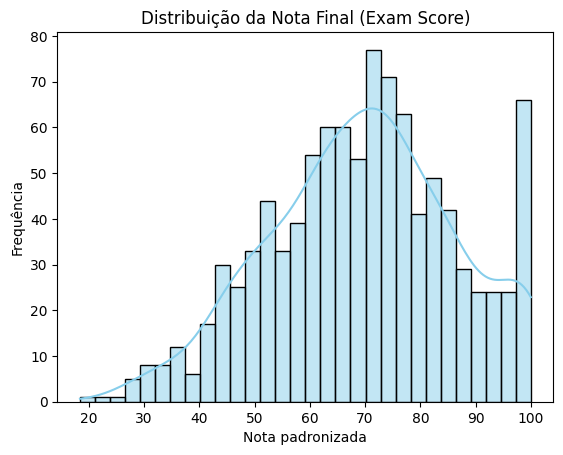

In [8]:
sns.histplot(df["exam_score"], kde=True, bins=30, color="skyblue")
plt.title("Distribuição da Nota Final (Exam Score)")
plt.xlabel("Nota padronizada")
plt.ylabel("Frequência")
plt.show()

C:\Users\rafae\AppData\Local\Temp\ipykernel_13628\2077578810.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="gender", y="study_hours_per_day", palette="Set2")


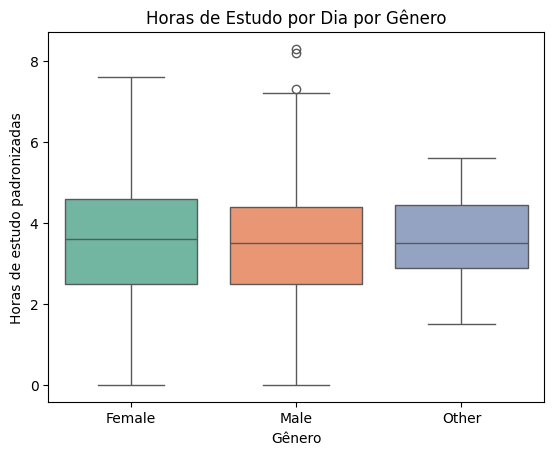

In [10]:
sns.boxplot(data=df, x="gender", y="study_hours_per_day", palette="Set2")
plt.title("Horas de Estudo por Dia por Gênero")
plt.xlabel("Gênero")
plt.ylabel("Horas de estudo padronizadas")
plt.show()

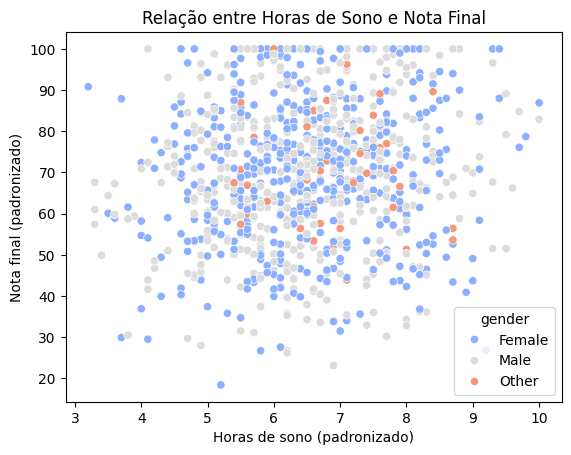

In [11]:
sns.scatterplot(data=df, x="sleep_hours", y="exam_score", hue="gender", palette="coolwarm")
plt.title("Relação entre Horas de Sono e Nota Final")
plt.xlabel("Horas de sono (padronizado)")
plt.ylabel("Nota final (padronizado)")
plt.show()

C:\Users\rafae\AppData\Local\Temp\ipykernel_13628\3688843833.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="extracurricular_participation", palette="pastel")


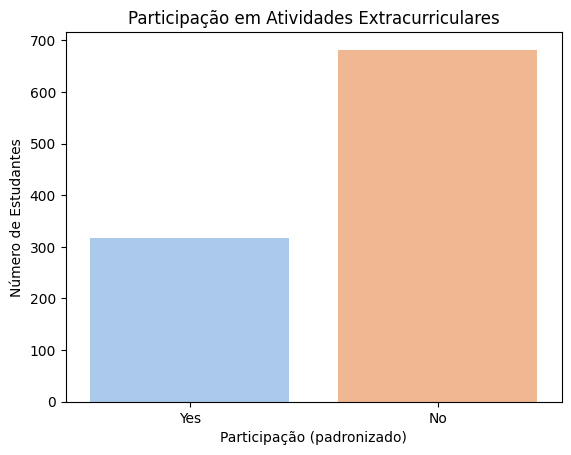

In [12]:
sns.countplot(data=df, x="extracurricular_participation", palette="pastel")
plt.title("Participação em Atividades Extracurriculares")
plt.xlabel("Participação (padronizado)")
plt.ylabel("Número de Estudantes")
plt.show()

C:\Users\rafae\AppData\Local\Temp\ipykernel_13628\2401735059.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="faixa_estudo", y="exam_score", data=df, palette="Blues")


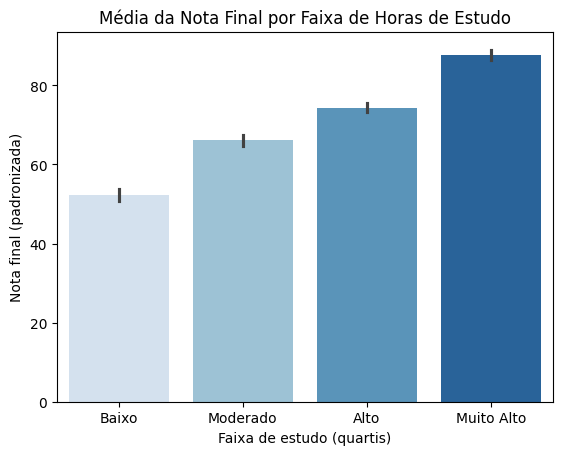

In [20]:
# Criar faixa artificial (após padronização)
df["faixa_estudo"] = pd.qcut(df["study_hours_per_day"], q=4, labels=["Baixo", "Moderado", "Alto", "Muito Alto"])

sns.barplot(x="faixa_estudo", y="exam_score", data=df, palette="Blues")
plt.title("Média da Nota Final por Faixa de Horas de Estudo")
plt.xlabel("Faixa de estudo (quartis)")
plt.ylabel("Nota final (padronizada)")
plt.show()


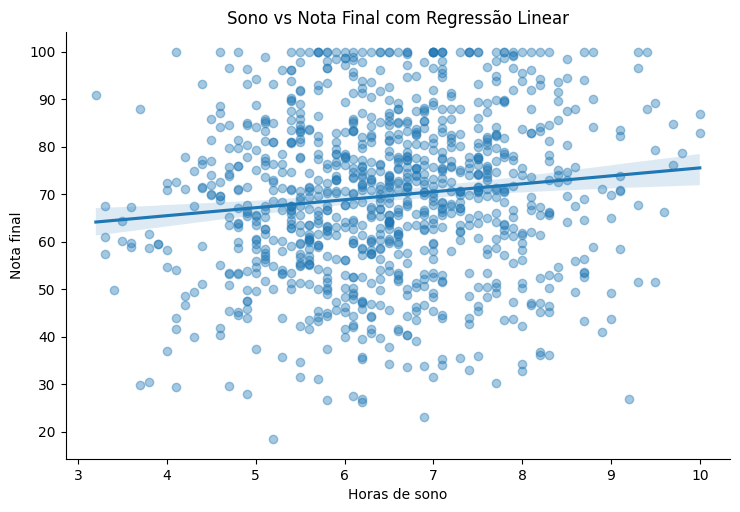

In [22]:
sns.lmplot(data=df, x="sleep_hours", y="exam_score", height=5, aspect=1.5, scatter_kws={'alpha':0.4})
plt.title("Sono vs Nota Final com Regressão Linear")
plt.xlabel("Horas de sono")
plt.ylabel("Nota final")
plt.show()

In [25]:
df[comportamento].dtypes

study_hours_per_day      float64
social_media_hours       float64
netflix_hours            float64
attendance_percentage    float64
sleep_hours              float64
diet_quality              object
exercise_frequency         int64
mental_health_rating       int64
exam_score               float64
dtype: object

In [26]:
df["diet_quality"] = df["diet_quality"].map({
    "Poor": 0,
    "Fair": 1,
    "Good": 2,
    "Excellent": 3
})

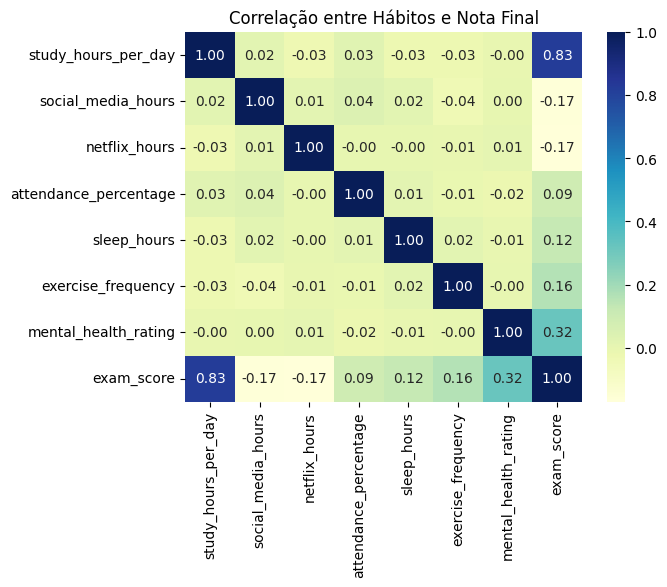

In [7]:
comportamento = [
    "study_hours_per_day",
    "social_media_hours",
    "netflix_hours",
    "attendance_percentage",
    "sleep_hours",
    "exercise_frequency",
    "mental_health_rating",
    "exam_score"
]

sns.heatmap(df[comportamento].corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlação entre Hábitos e Nota Final")
plt.show()

In [8]:
# Criar target com base na nota (ex: classificação em tercis)
df["target"] = pd.qcut(df["exam_score"], q=3, labels=["Low", "Medium", "High"])

In [9]:
X = df.drop(["exam_score", "target"], axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X.select_dtypes(include='object').columns

Index(['student_id', 'gender', 'part_time_job', 'diet_quality',
       'parental_education_level', 'internet_quality',
       'extracurricular_participation'],
      dtype='object')

In [11]:
# Remover colunas que são apenas strings ou duplicadas
X = X.drop(columns=["student_id", "extra_label", "job_label"], errors="ignore")

# Codificar gênero se ainda estiver como string
if X["gender"].dtype == 'object':
    le = LabelEncoder()
    X["gender"] = le.fit_transform(X["gender"])

In [12]:
print(X.dtypes)

age                                int64
gender                             int64
study_hours_per_day              float64
social_media_hours               float64
netflix_hours                    float64
part_time_job                     object
attendance_percentage            float64
sleep_hours                      float64
diet_quality                      object
exercise_frequency                 int64
parental_education_level          object
internet_quality                  object
mental_health_rating               int64
extracurricular_participation     object
dtype: object


In [13]:
# Converter variáveis categóricas em números (LabelEncoder ou mapping)
label_cols = [
    'part_time_job',
    'parental_education_level',
    'internet_quality',
    'extracurricular_participation',
    'faixa_estudo'  # ou remova se for derivada
]

le = LabelEncoder()

for col in label_cols:
    if X[col].dtype == 'object' or str(X[col].dtype) == 'category':
        X[col] = le.fit_transform(X[col].astype(str))


KeyError: 'faixa_estudo'

In [14]:
print(X.dtypes)

age                                int64
gender                             int64
study_hours_per_day              float64
social_media_hours               float64
netflix_hours                    float64
part_time_job                      int64
attendance_percentage            float64
sleep_hours                      float64
diet_quality                      object
exercise_frequency                 int64
parental_education_level           int64
internet_quality                   int64
mental_health_rating               int64
extracurricular_participation      int64
dtype: object


In [15]:
# Remover a coluna 'student_id' (não é relevante para o modelo)
df = df.drop(columns=['student_id'])

# Separar features (X) e target (y)
X = df.drop(columns=['exam_score'])  # Todas as colunas exceto 'exam_score'
y = df['exam_score']  # Variável alvo

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar se todas as colunas são numéricas
print(X_train.dtypes)

# Se houver outras colunas não numéricas, transforme-as (ex: usando LabelEncoder)
# Exemplo para colunas categóricas:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# for col in X_train.select_dtypes(include=['object']).columns:
#     X_train[col] = label_encoder.fit_transform(X_train[col])
#     X_test[col] = label_encoder.transform(X_test[col])

# Treinar os modelos
models = {
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(f"{name} - Acurácia: {acc:.2f}")

age                                 int64
gender                             object
study_hours_per_day               float64
social_media_hours                float64
netflix_hours                     float64
part_time_job                      object
attendance_percentage             float64
sleep_hours                       float64
diet_quality                       object
exercise_frequency                  int64
parental_education_level           object
internet_quality                   object
mental_health_rating                int64
extracurricular_participation      object
target                           category
dtype: object


ValueError: could not convert string to float: 'Female'